### Camera Calibration with OpenCV
#### 1. Detecting Corners

In [251]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import glob

In [252]:
# prepare object points
nx = 9 #number on inside corners in x
ny = 6 #number of inside corners in y

# prepare object points
objp = np.zeros((6*9,3), np.float32)
objp[0:54, 0:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3D coordinates in real world space
imgpoints = [] # 2D coordinates in image plane

# make list of calibration images
images = glob.glob('calibration_images/calib_*.jpg')

for index, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # if found, draw the corners
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

#### 2. Calibration

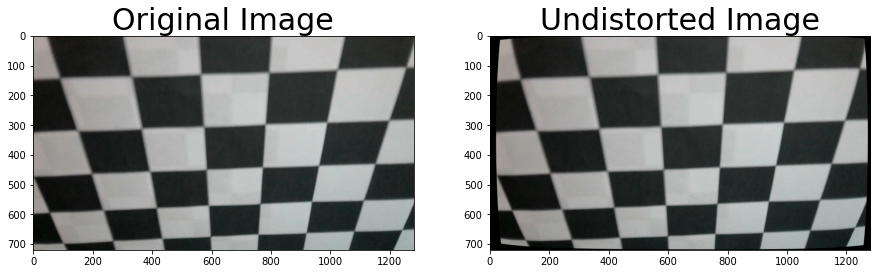

In [253]:
# test undistortion on an image
img = cv2.imread('calibration_images/dist.jpg')
img_size = (img.shape[0], img.shape[1])

# perform calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_images/undist.jpg', dst)

# save the camera calibration result for later use
dist_pickles = {}
dist_pickles["mtx"] = mtx
dist_pickles["dist"] = dist
pickle.dump(dist_pickles, open('calibration_images/dist_pickle.p', "wb"))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)
plt.show()

In [268]:
mtx

array([[1.41877199e+03, 0.00000000e+00, 6.57321672e+02],
       [0.00000000e+00, 1.41752866e+03, 3.46187591e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])